# Minitrabalho 1 – Filtro colaborativo

## 1) Algoritmo de força-bruta


#### 1.a) [1 valor] Descreva brevemente qual seria o algoritmo de força-bruta que resolve o problema do número de inversões num array.

__R:__ O algoritmo de força-bruta que resolve o problema do número de inversões num array seria percorrer o array e para cada elemento, percorrer o restante do array e verificar se o elemento atual é maior do que o elemento que estamos a comparar. Caso seja, incrementa-se o contador de inversões. No final, devolve-se o contador de inversões que contém o número de inversões no array.

#### 1.b) [1 valor] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [134]:
def count_inversions_brute_force(arr):
    count = 0
    n = len(arr)
    for i in range(n):                  
        for j in range(i+1, n):         
            if arr[i] > arr[j]:         
                count += 1
    return count

#### 1.c) [3 valores] Apresente uma análise assintótica do seu algoritmo, considerando o número de acessos ao array (ou seja, o número de acessos para leitura e escrita de uma posição do array) que são executados para o seu algoritmo em função do tamanho, n, do array. Nota: É esperado que sejam apresentados os cálculos completos do número de acessos assim como a correspondente conclusão sobre o tempo de execução do algoritmo (utilizando notação assintótica).

**R: Análise assintótica do algoritmo:**

Quando se obtém o tamanho do array acede-se 1 vez à memória: `n = len(arr)`

No loop externo, faz-se variar `i` de `0` a `n-1`, enquanto que no loop interno faz-se variar `j` de `i+1` a `n-1`, pelo que dentro dos loops se aceda à memória 2 vezes em cada iteração `(if arr[i] > arr[j]:)`:

$$
\sum_{i=0}^{n-1} \sum_{j=i+1}^{n-1} 2
$$

Percebe-se que para cada iteração `i`, o loop interno executa-se `n-i-1` vezes pelo que podemos simplificar a expressão para:

$$
\sum_{i=0}^{n-1} 2*(n - i - 1)
$$

Por sua vez, deparamo-nos com uma soma de sucessões aritméticas, e assim temos:

$$
2 * \frac{n*(n-1)}{2} = n^2 - n
$$

Finalmente, em termos de notação assintótica descartamos os termos constantes e de ordem inferior pelo que o algorimo tem uma complexidade de:

$$\Theta(n^2)$$






## 2) Algoritmo dividir-e-conquistar

#### 2.a) [3 valores] Proponha uma solução melhorada que utilize a estratégia dividir-e-conquistar para resolver o problema do número de inversões num array de forma mais eficiente. 
Nota: É esperado que sejam descritos os passos básicos para a conceção do seu algoritmo. Deve também apresentar o pseudocódigo correspondente.

Dica: A solução passará por utilizar um dos algoritmos de ordenação abordados nas aulas.

**R:** Uma solução que utiliza a estratégia dividir-e-conquistar que resolve o problema do número de inversões seria criar uma adaptação do Mergesort que conta o numero de inversões durante o processo de ordenação.

Inicialmente verifica-se se o array é constituído por 1 ou 0 elementos e caso o seja o número de inversões é 0 uma vez que o array se encontra já ordenado.

Seguidamente divide-se a lista em duas metades(left e right) e aplica-se recursivamente o algoritmo a ambas as metades.

Numa outra função combinamos as duas metades ordenadas e durante a mesclagem, se um elemento da metade left for maior que um elemento da metade right, incrementa o contador pelo numero de elementos não analisados na metade left.

**R:** **Pseudocódigo:**

**mergeSortInversions**(arr):
```pseudo
    //Conta o número de inversões de um array
    //Input: arr corresponde ao array do qual se pretende calcular o número de inversões
    //Output: retorna o total de inversões do array arr
    
    if tamanho(arr) <= 1:
        retornar 0
    else:
        meio = ⌊tamanho(arr)/2⌋  // Calcula o valor do índice do meio do array, usando o floor para quando o array tem tamanho ímpar 
        esquerda = arr[:meio]   // Define o array esquerda com todos os índice do arr até ao índice meio
        direita = arr[meio:]    // Define o array direita com todos os índices do arr a partir do índice meio
        contagem = mergeSortInversions(esquerda)
        contagem += mergeSortInversions(direita)
        contagem += merge(esquerda, direita, arr)
        retornar contagem
    endif
```


**merge**(esquerda, direita, arr):
```pseudo
    //O algoritmo implementado é uma variação do algoritmo de ordenação Merge Sort que conta o número de inversões em um array.
    //Input: O algoritmo recebe como entrada um array não ordenado.
    //Output: O algoritmo retorna o número total de inversões presentes no array.

    i, j, k, contagem = 0, 0, 0, 0
    while i < tamanho(esquerda) e j < tamanho(direita):
        if esquerda[i] <= direita[j]:
            arr[k] = esquerda[i]
            i += 1
        else:
            arr[k] = direita[j]
            j += 1
            contagem += (tamanho(esquerda) - i)
        k += 1
        endif
    endwhile

    while i < tamanho(esquerda):
        arr[k] = esquerda[i]
        i += 1
        k += 1
    endwhile

    while j < tamanho(direita):
        arr[k] = direita[j]
        j += 1
        k += 1
    endwhile
    
    retornar contagem
```

#### 2.b) [2 valores] Implemente em Python o algoritmo descrito na alínea anterior. O algoritmo deve receber como entrada uma coleção de inteiros, e devolver o número de inversões encontrados nesta coleção.

In [135]:
def mergeSortInversions(arr):
    if len(arr) <= 1:
        return 0
    else:
        mid = len(arr) // 2
        left = arr[:mid]
        right = arr[mid:]
        count = mergeSortInversions(left)
        count += mergeSortInversions(right)
        count += merge(left, right, arr)
        return count
    
def merge(left, right, arr):
    i,j,k,count = 0,0,0,0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
            count += (len(left) - i)
        k += 1
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1
    return count

#### 2.c) [3 valores] Utilizando o método de indução, mostre que o seu algoritmo está correto.
Nota: Inicie por apresentar um pseudocódigo simplificado do seu algoritmo (se ainda não o fez na
alínea 2.a)). Para facilitar, pode também considerar que o tamanho n do array é uma potência de 2.

**R:** **Caso Base (`len(arr)<=1`):** Numa lista com 1 ou 0 elementos não há inversões, pelo que o algoritmo devolve `0`.

**Hipótese de Indução:** O algoritmo `mergeSortInversions` calcula corretamente o número de inversões para todos os arrays de tamanho menor que `n`.


**Passo Indutivo:** Supondo que o algoritmo está correto para todas as listas com tamanho menor que `n`, temos de provar que o algoritmo é correto para uma lista de tamanho `n`.

O algoritmo divide a lista em duas metades, `left` e `right`, e recursivamente determina o numero de inversões em cada uma das metades. Como cada metade tem tamanho menor que `n` pela H.I., sabemos que o algoritmo calcula corretamente o numero de inversões em cada metade.

Seguidamente, o algoritmo calcula as inversões entre as duas metades na função `merge`. Quando um elemento em `right` é menor que um elemento em `left`, sabemos que há `(len(left) - i)` inversões, uma vez que `left` e `right` estão ordenados. Portanto, o algoritmo calcula corretamente as inversões entre as duas metades.

**Conclusão:** Assim, o algoritmo `mergeSortInversions` calcula corretamente o número total de inversões em um array de tamanho `n`.




#### 2.d) [3 valores] Apresente uma análise assintótica do seu algoritmo, utilizando uma das técnicas abordadas em aula, ou seja, o teorema principal, ou o método da indução e substituição.
Nota: É esperado que apresente a fórmula recorrente do cálculo do trabalho do seu algoritmo bem
como os passos necessários para estabelecer a ordem de complexidade do algoritmo (utilizando
notação assintótica).

**R: Análise assintótica do algoritmo:**

Fórmula recorrente geral para o algoritmo:
$$
T(n) = 2 \cdot T\left(\frac{n}{2}\right) + \Theta(n)
$$
No qual, `T(n)` corresponde ao tempo de execução, `n` corresponde ao tamanho do array input do algoritmo e `Θ(n)` corresponde ao tempo necessário para a mesclagem.

Pelo Teorema Principal:
$$
T(n) = \begin{cases}
\Theta(1) & \text{se } n = 1 \\
a \cdot T\left(\frac{n}{b}\right) + f(n) & \text{senão}
\end{cases}
$$
$$
\text{Onde:}
\begin{cases}
1. & \text{Se } a < b^d \rightarrow T(n) = O(n^d) \\
2. & \text{Se } a = b^d \rightarrow T(n) = O(n^d \cdot \log n) \\
3. & \text{Se } a > b^d \rightarrow T(n) = O(n^{\log_b a})
\end{cases}
$$

Pelo teorema, temos:
\begin{align*}
a & = 2, \\
b & = 2, \\
d & = 1
\end{align*}

Sendo assim, a = b<sup>d</sup>  pelo que:

$$
T(n) = \Theta(n^1 \cdot log_2(n))
$$ 
Ou seja,
$$
T(n) = \Theta(n \cdot \log_2 n)
$$ 

#### 3.a) [1 valores] Crie uma bateria de testes e cronometre o tempo de execução de cada um dos algoritmos desenvolvidos em 1) e 2). Repita cada cronometragem, pelo menos, 35 vezes e registe o tempo médio de execução para cada algoritmo.
Nota: Exatamente a mesma coleção deve ser gerada antes das invocações dos diferentes algoritmos
nos respetivos testes. Esta coleção deve conter números inteiros aleatórios sem repetição.

In [136]:
def n_2_algorithm(arr):
    size = len(arr)
    count = 0
    for i in range(size):
        for j in range(size):
            count += 1
    return count

def n_log2n_algorithm(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left_half = n_log2n_algorithm(arr[:mid])
    right_half = n_log2n_algorithm(arr[mid:])
    return merge_n_logn(left_half, right_half)

def merge_n_logn(left, right):
    merged = []
    left_index = 0
    right_index = 0
    while left_index < len(left) and right_index < len(right):
        if left[left_index] <= right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1
    merged.extend(left[left_index:])
    merged.extend(right[right_index:])
    return merged
    
    

In [137]:
import time
import random

TEST_STARTING_ARRAY_SIZE = 0
TEST_MAX_ARRAY_SIZE = 1000
TEST_ARRAY_INTERVAL = 10

array_sizes = list(range(TEST_STARTING_ARRAY_SIZE, TEST_MAX_ARRAY_SIZE, TEST_ARRAY_INTERVAL))
times_brute_force = []
times_merge_sort = []
times_n_2 = []
times_nlog2n = []


NUMBER_OF_TESTS = 35
def test_sorting_algorithm(algorithm, array_size):
    array = list(range(array_size))
    random.shuffle(array)
    start_time = time.time()

    for _ in range(NUMBER_OF_TESTS):
        algorithm(list(array))
    
    end_time = time.time()
    return (end_time - start_time) / NUMBER_OF_TESTS

for size in array_sizes:
    times_brute_force.append(test_sorting_algorithm(count_inversions_brute_force, size))
    times_merge_sort.append(test_sorting_algorithm(lambda arr: mergeSortInversions(arr), size))
    times_n_2.append(test_sorting_algorithm(lambda arr: n_2_algorithm(arr), size))
    times_nlog2n.append(test_sorting_algorithm(lambda arr: n_log2n_algorithm(arr), size))

#### 3.b) [2 valores] Faça o plot dos tempos de execução dos dois algoritmos propostos em 1) e em 2). Que conclusões tira?
Nota: É esperado que verifique se é possível estabelecer ligações entre as ordens de complexidade de
cada algoritmo.

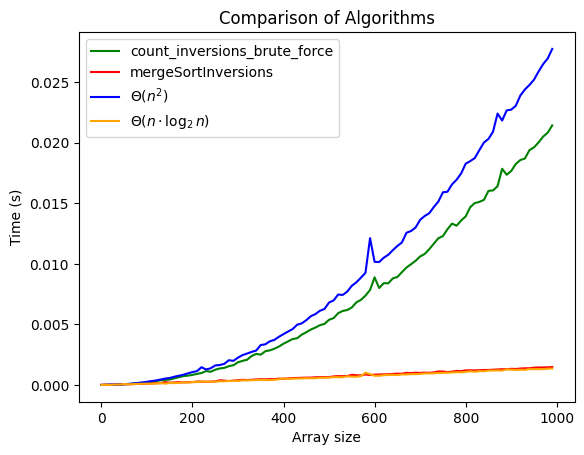

In [138]:
import matplotlib.pyplot as plt

def plot_test_results():
    plt.plot(array_sizes, times_brute_force, label='count_inversions_brute_force', color='green')
    plt.plot(array_sizes, times_merge_sort, label='mergeSortInversions', color='red')
    plt.plot(array_sizes, times_n_2, label='$\Theta(n^2)$', color='blue')
    plt.plot(array_sizes, times_nlog2n, label='$\Theta(n \cdot \log_2 n)$',color='orange')
    plt.xlabel('Array size')
    plt.ylabel('Time (s)')
    plt.title('Comparison of Algorithms')
    plt.legend()
    plt.show()

plot_test_results()


**R:** **Conclusão:** Podemos observar que o tempo de execução do algoritmo de força-bruta aumenta rapidamente à medida que o tamanho do array aumenta, enquanto que o tempo de execução do algoritmo baseado no Mergesort aumenta muito mais lentamente. Isso ilustra a eficiência superior do algoritmo `mergeSortInversions` para arrays grandes. No entanto, para arrays muito pequenos, a diferença de tempo pode não ser significativa.
Através da visualização do gráfico podemos também verificar o grau de complexidade de ambos os algoritmos uma vez que `count_inversions_brute_force` se aproxima de $\Theta(n^2)$ e o algoritmo `mergeSortInversions` se aproxima de $\Theta(n \cdot \log_2 n)$.

#### 4.a) [1 valor] Proponha possíveis melhorias ao algoritmo apresentado em 2) e refaça os testes empíricos realizados em 3) para avaliar se as melhorias são visíveis na prática.
Nota: É esperado que fundamente o porquê de estar a propor cada melhoria. É também esperada uma
breve discussão sobre a ordem de complexidade do algoritmo melhorado.

**R:Possíveis melhoria ao Algoritmo apresentado em 2:**

Utilização do Algoritmo do BruteForce, apresentado em 2b., para arrays de tamanho menor ao igual a 7. Desta forma, conseguimos utilizar o melhor dos dois Algoritmos, o count_inversions_brute_force para a contagem de arrays pequenos e o merge para arrays maiores.


In [139]:

def mergeSortInversionsImproved(arr):
    return mergeSortInversions(arr)
    
def mergeSortImproved(left, right, arr):
    BRUTEFORCE_ARRAY_LIMIT = 7
    
    if len(arr) <= BRUTEFORCE_ARRAY_LIMIT:
        return count_inversions_brute_force(arr)
    
    count = 0
    if len(left) <= BRUTEFORCE_ARRAY_LIMIT:
        count += count_inversions_brute_force(left)
    else:
        count += mergeSortImproved(left[:len(left)//2], left[len(left)//2:], left)
        
    if len(right) <= BRUTEFORCE_ARRAY_LIMIT:
        count += count_inversions_brute_force(right)
    else:
        count += mergeSortImproved(right[:len(right)//2], right[len(right)//2:], right)
    
    count += merge(left, right, arr)
    
    return count

In [140]:
times_merge_sort = []
times_merge_sort_improved = []
times_nlog2n = []

def test_results_improved():
    TEST_STARTING_ARRAY_SIZE = 0
    TEST_MAX_ARRAY_SIZE = 1000
    TEST_ARRAY_INTERVAL = 10
    array_sizes = list(range(TEST_STARTING_ARRAY_SIZE, TEST_MAX_ARRAY_SIZE, TEST_ARRAY_INTERVAL))
    
    for size in array_sizes:
        times_merge_sort.append(test_sorting_algorithm(lambda arr: mergeSortInversions(arr), size))
        times_merge_sort_improved.append(test_sorting_algorithm(lambda arr: mergeSortInversionsImproved(arr), size))
        times_nlog2n.append(test_sorting_algorithm(lambda arr: n_log2n_algorithm(arr), size))


test_results_improved()

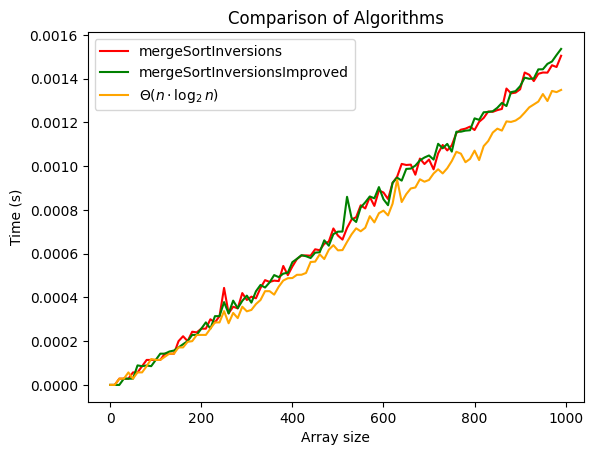

In [141]:
def plot_test_results_improved():
    plt.plot(array_sizes, times_merge_sort, label='mergeSortInversions', color='red')
    plt.plot(array_sizes, times_merge_sort_improved, label='mergeSortInversionsImproved', color='green')
    plt.plot(array_sizes, times_nlog2n, label='$\Theta(n \cdot \log_2 n)$', color='orange')
    plt.xlabel('Array size')
    plt.ylabel('Time (s)')
    plt.title('Comparison of Algorithms')
    plt.legend()
    plt.show()


plot_test_results_improved()

**R:** A eficiência dos dois algoritmos depende do tamanho do array e da distribuição dos valores. Para arrays grandes com muitos elementos desordenados, o primeiro algoritmo pode ser mais eficiente. Para arrays pequenos ou arrays grandes com poucos elementos desordenados, o segundo algoritmo pode ser mais eficiente. Contudo, ambos os algoritmos são de ordem $$ \Theta(n \cdot \log_2 n) $$

## 5) Questões Éticas

#### Tente resolver os problemas apenas com os integrantes do seu grupo antes de colaborar. Escreva as suas respostas por suas próprias palavras. Nunca deve partilhar o ficheiro fonte com as suas soluções com integrantes de outros grupos

#### 5.a) Se colaborou com alguém fora do seu grupo, indique aqui os respetivos nomes.

#### 5.b) Deve citar todas as fontes que utilizou fora do material da UC.

Escrita em latex: 

https://pt.overleaf.com/learn/latex/Integrals%2C_sums_and_limits

https://www.overleaf.com/learn/latex/List_of_Greek_letters_and_math_symbols

